An attempt to visualize the graphs generated to understand the trends in Radius of Gyration of all the 100-mer A-B type polymer is presented here.

The graphs from this image are used in the journal article 

P.S. Ramesh and Patra, Tarak K (2023), “Polymer sequence design via molecular simulation‐based active learning”, Soft Matter, 19, pp. 282‐294. DOI:10.1039/D2SM01193J

In [1]:
import numpy as np
import time
import random
import os
import subprocess
import shutil
import numpy
import pandas as pd

from matplotlib import pyplot as plt


#import mplcursors
import ast
from matplotlib.ticker import MaxNLocator
import matplotlib
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as ticker


import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np
#import mplcursors

from sklearn.metrics import r2_score


In [2]:
import mpltex
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 30
plt.rc('legend',fontsize=20) 
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['axes.linewidth'] = 2 #set the value globally

plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)
width = 10.22
height = 8.22

In [5]:
def graph_prep(file_var):

    #Retrieving Training set

    fitness_training= []
    ones_training = []

    for i in range(0,n_initial):
        rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var+"/GPR_training/sequence"+str(i)+".txt", "r")
        list_of_content = rad_file.readlines()
        array_of_content = np.array(list_of_content)
        seq_array = np.array([np.int(elem[0]) for elem in array_of_content[:-1]])
        ones_array = (seq_array==1).sum()
        ones_training.append(ones_array)

        try:
            fitness_training.append(float(list_of_content[-1][:-1]))

        except:
            fitness_training.append(float(list_of_content[-2][:-1]))
        rad_file.close()

    fitness_training_array = np.array(fitness_training)
    ones_training_array = np.array(ones_training)


    #Retrieving sm
    #One step access to AvgRg values across sm iterations

    fitness_sm= []

    rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var+"/AvgRg.txt")
    list_of_content = rad_file.readlines()
    #array_of_content = np.array(list_of_content)

    for i in range(n_iterations):
        fitness_sm.append(ast.literal_eval(list_of_content[i][:-1]))
    rad_file.close()

    fitness_sm_array = np.array(fitness_sm)

    #Retrieving no_ones in sm
    #One step access ones values across sm iterations

    ones_sm= []

    rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var+"/no_ones.txt")
    list_of_content = rad_file.readlines()
    #array_of_content = np.array(list_of_content)

    for i in range(n_iterations):
        ones_sm.append(ast.literal_eval(list_of_content[i][:-1]))
    rad_file.close()

    ones_sm_array = np.array(ones_sm)


    
    
    #Retrieving y_pred_mean

    y_pred_mean_global = []

    rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var+"/y_pred_mean.txt")
    list_of_content = rad_file.readlines()
    #array_of_content = np.array(list_of_content)

    for i in range(n_iterations):
        y_pred_mean_global.append(ast.literal_eval(list_of_content[i][:-1]))
    rad_file.close()

    y_pred_mean_global_array = np.array(y_pred_mean_global)


    #Retrieving y_pred_sdev

    y_pred_sdev_global = []

    rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var+"/y_pred_sdev.txt")
    list_of_content = rad_file.readlines()
    #array_of_content = np.array(list_of_content)

    for i in range(n_iterations):
        y_pred_sdev_global.append(ast.literal_eval(list_of_content[i][:-1]))
    rad_file.close()

    y_pred_sdev_global_array = np.array(y_pred_sdev_global)


    #Retrieving candidate size (Sampling pool)
    
    cand_size_global = []

    rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var+"/y_cand_size.txt")
    list_of_content = rad_file.readlines()
    #array_of_content = np.array(list_of_content)

    for i in range(n_iterations):
        cand_size_global.append(ast.literal_eval(list_of_content[i][:-1]))
    rad_file.close()

    cand_size_global_array = np.array(cand_size_global)

    

    #Extracting the minimum fitness and the corresponding no. of ones

    training_f_min = min(fitness_training_array)
    ind_fitness_training_min = fitness_training.index(training_f_min)
    corres_ones_training = ones_training_array[ind_fitness_training_min]

    min_fitness_eachgen = []
    corres_ones = []

    for gen_no in range(n_iterations):
        f_gen_no = fitness_sm_array[gen_no]
        ones_gen_no = ones_sm_array[gen_no]

        #computing the minimum
        f_gen_min = min(f_gen_no)

        #extracting the index, and computing the corresponding no. of ones
        #the conversion to list is to enable the .index function
        ind_for_min = list(f_gen_no).index(f_gen_min)
        ones_gen_min = ones_gen_no[ind_for_min]

        min_fitness_eachgen.append(f_gen_min)
        corres_ones.append(ones_gen_min)


    min_fitness_each_cycle = np.array([training_f_min] + min_fitness_eachgen)
    corres_ones_each_cylce = np.array([corres_ones_training] + corres_ones)

    #Compilation of Cumulative Data
    ones_ravel = list(ones_training_array) + list(ones_sm_array.ravel())

    f_sofar = list(fitness_training_array)
    comp_sofar = [len(fitness_training_array)]

    min_fitness_sofar = [min(fitness_training_array)]
    corres_index = list(fitness_training_array).index(min(fitness_training_array))
    cumulative_corres_ones = [ones_ravel[corres_index]]


    for gen_no in range(n_iterations):   
        f_gen_no = list(fitness_sm_array[gen_no])
        f_sofar = f_sofar + f_gen_no
        f_min_sofar_gen = min(f_sofar)

        corres_index = f_sofar.index(f_min_sofar_gen)
        corres_ones_min = ones_ravel[corres_index]

        min_fitness_sofar.append(f_min_sofar_gen)
        cumulative_corres_ones.append(corres_ones_min)

        comp_gen_no = len(f_gen_no)
        comp_sofar_gen = comp_sofar[-1]+comp_gen_no
        comp_sofar.append(comp_sofar_gen)
    
    return(fitness_training, fitness_sm, comp_sofar, min_fitness_sofar, cumulative_corres_ones, fitness_sm_array, y_pred_mean_global_array, y_pred_sdev_global_array, cand_size_global_array)



In [6]:
#INITIALIZATION of the numeric variables

num_weights = 100
n_initial = 112
n_sm = 32
n_iterations = 75
t = "GPR (Matern Kernel)"

f1 ="N100_sample_11m20"
f2 ="N100_sample_11m10"
f3 ="N100_sample_1100"
f4 = "N100_sample_1110"
f5 = "N100_sample_11p0"

#note the corres_ones_min over here and that in the afforementioned code are slightly different 
#in the function it is the cumulative ones that is extracted

f_t_i, f_s_i, comp_sofar_i, min_fitness_sofar_i, corres_ones_min_i, fitness_sm_i, ypredmean_i, ypredsdev_i, sp_i = graph_prep(f1)
f_t_ii, f_s_ii, comp_sofar_ii, min_fitness_sofar_ii, corres_ones_min_ii, fitness_sm_ii, ypredmean_ii, ypredsdev_ii, sp_ii = graph_prep(f2)
f_t_iii, f_s_iii, comp_sofar_iii, min_fitness_sofar_iii, corres_ones_min_iii, fitness_sm_iii, ypredmean_iii, ypredsdev_iii, sp_iii = graph_prep(f3)
f_t_iv, f_s_iv, comp_sofar_iv, min_fitness_sofar_iv, corres_ones_min_iv, fitness_sm_iv, ypredmean_iv, ypredsdev_iv, sp_iv = graph_prep(f4)
f_t_v, f_s_v, comp_sofar_v, min_fitness_sofar_v, corres_ones_min_v, fitness_sm_v, ypredmean_v, ypredsdev_v, sp_v = graph_prep(f5)


iteration_x_coord = [elem+1 for elem in range(n_iterations)]

r2_list_i = [r2_score(np.negative(f_s_i[j]), ypredmean_i[j]) for j in range(len(fitness_sm_i))]
r2_list_ii = [r2_score(np.negative(f_s_ii[j]), ypredmean_ii[j]) for j in range(len(fitness_sm_ii))]
r2_list_iii = [r2_score(np.negative(f_s_iii[j]), ypredmean_iii[j]) for j in range(len(fitness_sm_iii))]
r2_list_iv = [r2_score(np.negative(f_s_iv[j]), ypredmean_iv[j]) for j in range(len(fitness_sm_iv))]
r2_list_v = [r2_score(np.negative(f_s_v[j]), ypredmean_v[j]) for j in range(len(fitness_sm_v))]



op_i = [min_fitness_sofar_i[i] - min_fitness_sofar_i[i+1] for i in range(len(min_fitness_sofar_i)-1)]
op_ii = [min_fitness_sofar_ii[i] - min_fitness_sofar_ii[i+1] for i in range(len(min_fitness_sofar_i)-1)]
op_iii = [min_fitness_sofar_iii[i] - min_fitness_sofar_iii[i+1] for i in range(len(min_fitness_sofar_i)-1)]
op_iv = [min_fitness_sofar_iv[i] - min_fitness_sofar_iv[i+1] for i in range(len(min_fitness_sofar_i)-1)]
op_v = [min_fitness_sofar_v[i] - min_fitness_sofar_v[i+1] for i in range(len(min_fitness_sofar_v)-1)]



#EI zoomin
#Retrieving max of MaxEI

file_var = f3
maxEI_2D = []

rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var + "/maxEI_each_iteration.txt")
list_of_content = rad_file.readlines()

for i in range(n_iterations):
    maxEI_2D.append(ast.literal_eval(list_of_content[i][:-1]))
rad_file.close()

maxEI_2D_array = np.array(maxEI_2D)
max_maxEI = np.max(maxEI_2D_array, axis = 1)


#Retrieving no. of common candidates recommended by Exploitation & MaxEI, Exploration & MaxEI

file_var = f3
exploit_maxEI_overlap_global = []

rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var + "/exploit_maxEI_overlap.txt")
list_of_content = rad_file.readlines()

for i in range(n_iterations):
    exploit_maxEI_overlap_global.append(ast.literal_eval(list_of_content[i][:-1]))
rad_file.close()

exploit_maxEI_common = np.array(exploit_maxEI_overlap_global)

file_var = f3
explore_maxEI_overlap_global = []

rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var + "/explore_maxEI_overlap.txt")
list_of_content = rad_file.readlines()

for i in range(n_iterations):
    explore_maxEI_overlap_global.append(ast.literal_eval(list_of_content[i][:-1]))
rad_file.close()

explore_maxEI_common = np.array(explore_maxEI_overlap_global)



#PI Zoom in
#Retrieving max of MaxPI

file_var = f4
maxPI_2D = []

rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var + "/maxPI_each_iteration.txt")
list_of_content = rad_file.readlines()

for i in range(n_iterations):
    maxPI_2D.append(ast.literal_eval(list_of_content[i][:-1]))
rad_file.close()

maxPI_2D_array = np.array(maxPI_2D)
max_maxPI = np.max(maxPI_2D_array, axis = 1)

#Retrieving no. of common candidates recommended by Exploitation & MaxPI

file_var = f4
exploit_maxPI_overlap_global = []

rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var + "/exploit_maxPI_overlap.txt")
list_of_content = rad_file.readlines()

for i in range(n_iterations):
    exploit_maxPI_overlap_global.append(ast.literal_eval(list_of_content[i][:-1]))
rad_file.close()

exploit_maxPI_common = np.array(exploit_maxPI_overlap_global)


#Retrieving no. of common candidates recommended by Exploration & MaxPI

file_var = f4
explore_maxPI_overlap_global = []

rad_file = open("/Users/praneeth/Downloads/Active_Learning/Date_June17/" + file_var + "/explore_maxPI_overlap.txt")
list_of_content = rad_file.readlines()

for i in range(n_iterations):
    explore_maxPI_overlap_global.append(ast.literal_eval(list_of_content[i][:-1]))
rad_file.close()

explore_maxPI_common = np.array(explore_maxPI_overlap_global)

/var/folders/fc/mjdjhyc14l1fg9j0fbzhj0_00000gn/T/ipykernel_26259/1312280833.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seq_array = np.array([np.int(elem[0]) for elem in array_of_content[:-1]])


In [7]:
#Defining the plot_gen for plotting over each generation
#snapshot plot

def plot_gen(gen_no, f_sm_piece, twos_sm_piece):

    fig, ax = plt.subplots(figsize = (10,5))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))


    twos_gen_no = twos_sm_piece[gen_no]
    f_gen_no = f_sm_piece[gen_no]
    
    plt.plot(twos_gen_no, f_gen_no, '.')
    plt.xlabel('No of 1s')
    plt.ylabel('Avg Rg')
    title_text = 'Iteration '+ str(gen_no)
    plt.title(title_text)

In [8]:
#Figure 3
major_size = 30
minor_size = 10

In [9]:
def minAvgRg_cumulative(text):
    
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_ylim(top=2.90)
    ax.set_ylim(bottom = 2.40)
    elems = list(5*np.arange(16))
    
    #ax.plot(x_p, y_p, '.')
    x = [comp_sofar_i[elem] for elem in elems]
    y1 = [min_fitness_sofar_i[elem] for elem in elems]
    y2 = [min_fitness_sofar_ii[elem] for elem in elems]
    y3 = [min_fitness_sofar_iii[elem] for elem in elems]
    y4 = [min_fitness_sofar_iv[elem] for elem in elems]
    y5 = [min_fitness_sofar_v[elem] for elem in elems]
    
    linestyles = mpltex.linestyle_generator()

    ax.plot(x, y1, label = "Pure exploitation", **next(linestyles), markersize = 10)

    ax.plot(x, y2, label = "Pure exploration", **next(linestyles), markersize = 10)
    
    ax.plot(x, y3, label = "Max EI",  **next(linestyles), markersize = 10)
    
    ax.plot(x, y4, label = "Max PI",  **next(linestyles), markersize = 10)
    
    ax.plot(x, y5,  label = "Random",  **next(linestyles), markersize = 10)

    plt.legend(loc="best", frameon=False, markerscale=2.)



    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.10))
    
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    
    ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
    ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

    ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

    
    #ax.set_xticklabels(ax.get_xticks(), fontProperties)
    #ax.set_yticklabels(ax.get_yticks(), fontProperties)
    
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False

    
    #plt.ylabel('Rg', fontweight='bold')
    plt.xlabel('Number of Candidates Evaluated')
    plt.xticks(rotation = 45)

   


    fig.set_size_inches(width, height)  
    #fig.set_size_inches(width, width)  
    
    plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text + '/' + text + '_MinAvgRg_so_far_versus_No_of_computations.pdf', bbox_inches='tight')
    plt.show()

 Active learning of radius of gyration of the copolymer using 5 different Acquisiton Function

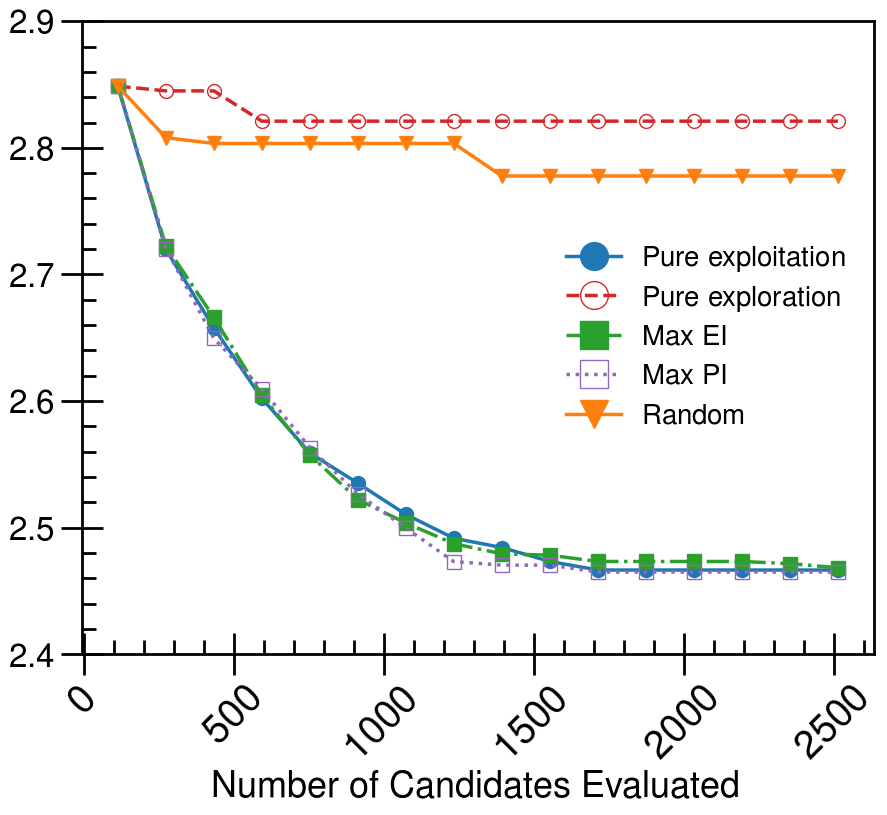

In [10]:
minAvgRg_cumulative(t)

In [11]:
#Figure 4

major_size = 30
minor_size = 10

In [12]:
def corres_ones(text):

    fig, ax = plt.subplots(figsize=(12,12))
    fig.set_size_inches(width, height)

    
    elems = list(5*np.arange(16))
    
    linestyles = mpltex.linestyle_generator()

    x = [comp_sofar_i[elem] for elem in elems]
    y1 = [corres_ones_min_i[elem] for elem in elems]
    y2 = [corres_ones_min_ii[elem] for elem in elems]
    y3 = [corres_ones_min_iii[elem] for elem in elems]
    y4 = [corres_ones_min_iv[elem] for elem in elems]
    y5 = [corres_ones_min_v[elem] for elem in elems]
    
    plt.ylim([50, 100])


    
    ax.plot(x, y1, label = "Pure exploitation", **next(linestyles), markersize = 10)

    ax.plot(x, y2, label = "Pure exploration", **next(linestyles), markersize = 10)
    
    ax.plot(x, y3, label = "Max EI",  **next(linestyles), markersize = 10)
    
    ax.plot(x, y4, label = "Max PI",  **next(linestyles), markersize = 10)
    
    ax.plot(x, y5,  label = "Random",  **next(linestyles), markersize = 10)
    
    ax.legend(loc="best", frameon=False, markerscale=2.)

    plt.xticks(rotation = 45, weight = 'bold')


    #ax.plot(comp_sofar_i, corres_ones_min_i, 'k')
    #ax.plot(comp_sofar_i, corres_ones_min_i, 'o', label = "Pure exploitation")
    
    #ax.plot(comp_sofar_ii,corres_ones_min_ii, 'k')
    #ax.plot(comp_sofar_ii,corres_ones_min_ii, '^', label = "Pure exploration")
    
    #ax.plot(comp_sofar_iii, corres_ones_min_iii, 'k')
    #ax.plot(comp_sofar_iii, corres_ones_min_iii, '*', label = "Max EI")
    
    #ax.plot(comp_sofar_iv, corres_ones_min_iv, 'k')
    #ax.plot(comp_sofar_iv, corres_ones_min_iv, 'v', label = "Max PI")

    #ax.plot(comp_sofar_v, corres_ones_min_v, 'k')
    #ax.plot(comp_sofar_v, corres_ones_min_v, 'P', label = "Random")


 
    #mplcursors.cursor(hover=True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.10))
    
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    
    ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
    ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

    ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

    
    #ax.set_xticklabels(ax.get_xticks(), fontProperties)
    #ax.set_yticklabels(ax.get_yticks(), fontProperties)
    
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False

    
    #plt.ylabel('Rg', fontweight='bold')
    plt.xlabel('Number of Candidates Evaluated')
    plt.xticks(rotation = 45)
    
    
    
    
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    #plt.title(text + ' | No of ones corresponding to Cumulative Minimum Rg versus No of Computations performed', fontsize = 'large')
    plt.ylabel('Number of As', fontweight='bold')
    plt.xlabel('Number of Candidates Evaluated', fontweight='bold')
    
    plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text + '/' + text + '_No_of_ones_versus_No_of_computations.pdf', bbox_inches='tight')
    plt.show()
    


Quality of solution obtained via active learning. The number of A type moieties present in the best polymer identified during each step is plotted for active learning

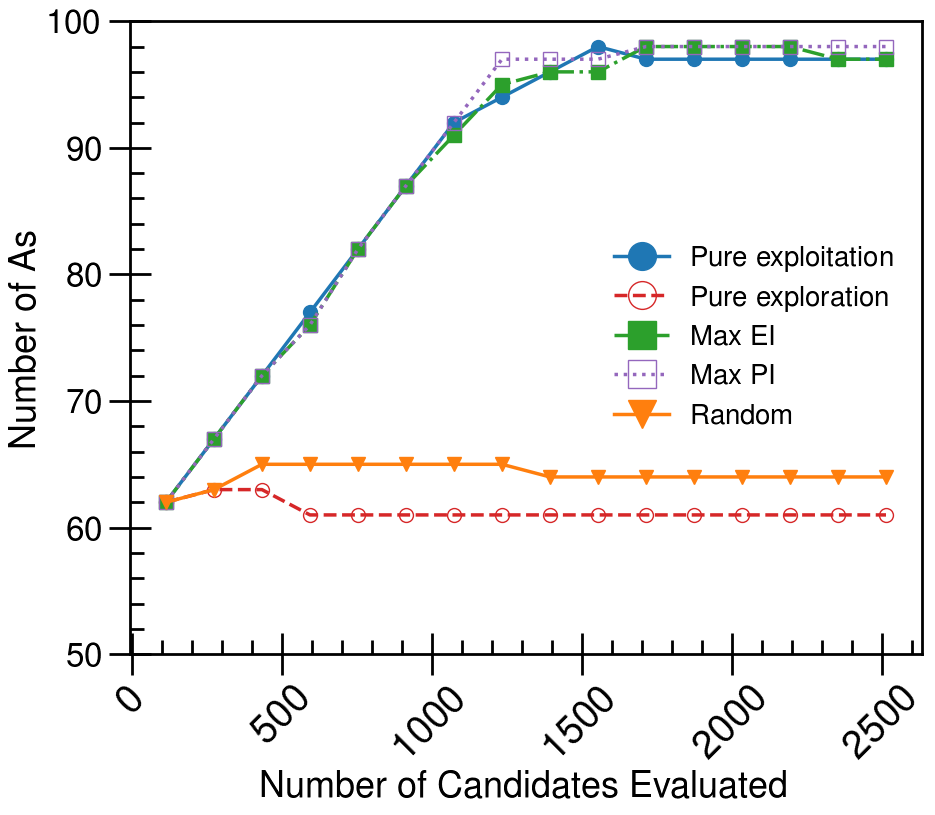

In [13]:
corres_ones(t)

Analysis of Stopping Criteria for different query strategies. The decrease in Rg is plotted as a function of the
iteration number, for a specific surrogate model (Gaussian Process Regression with Matérn kernel)

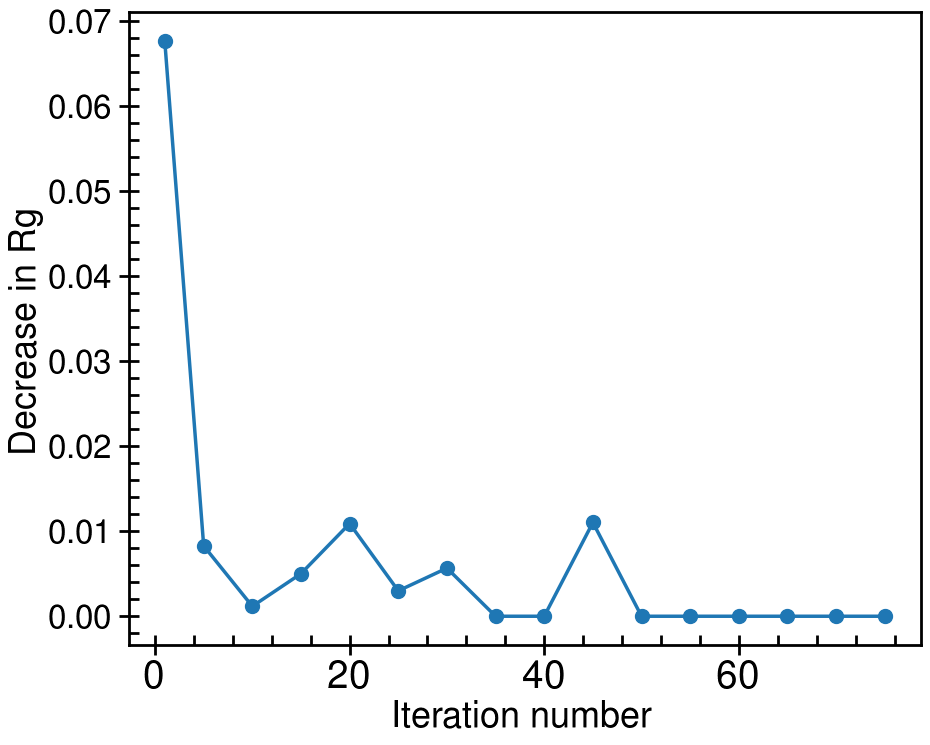

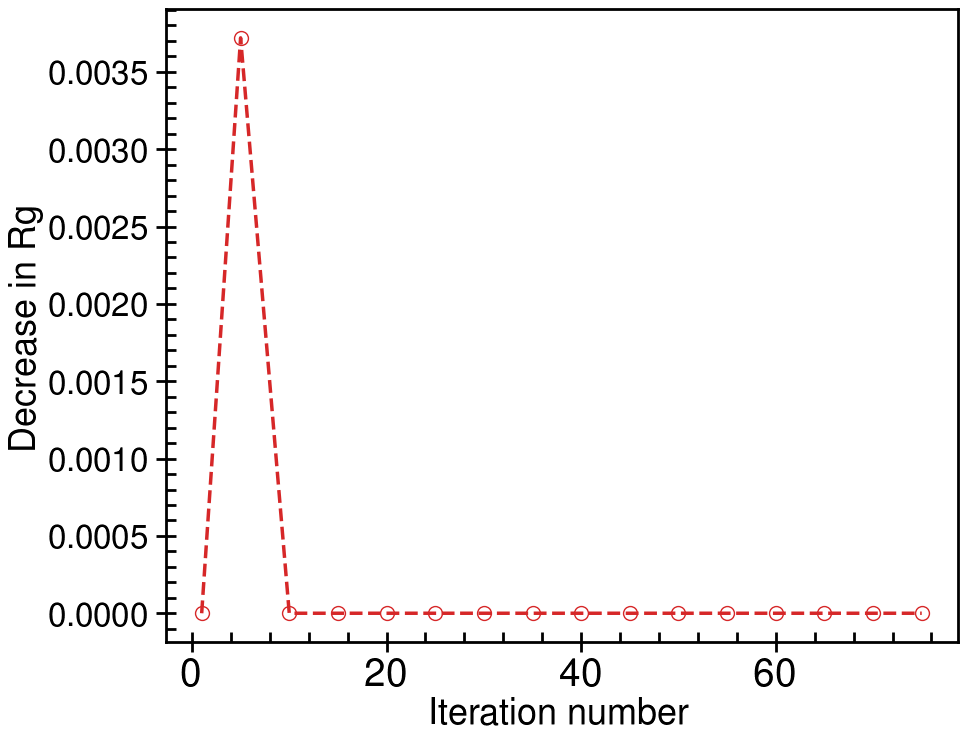

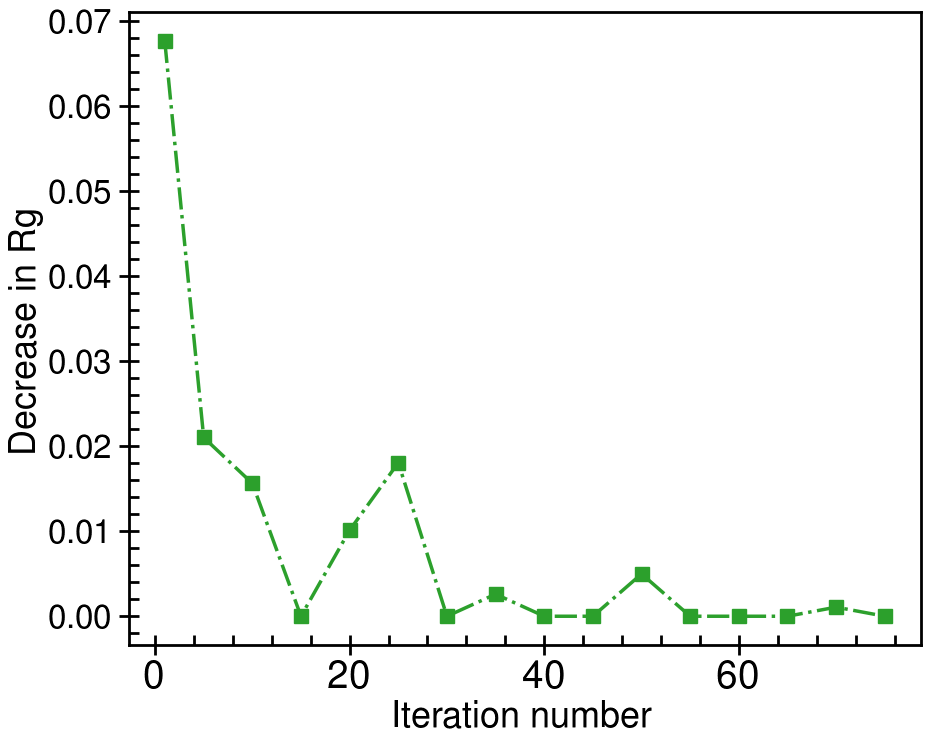

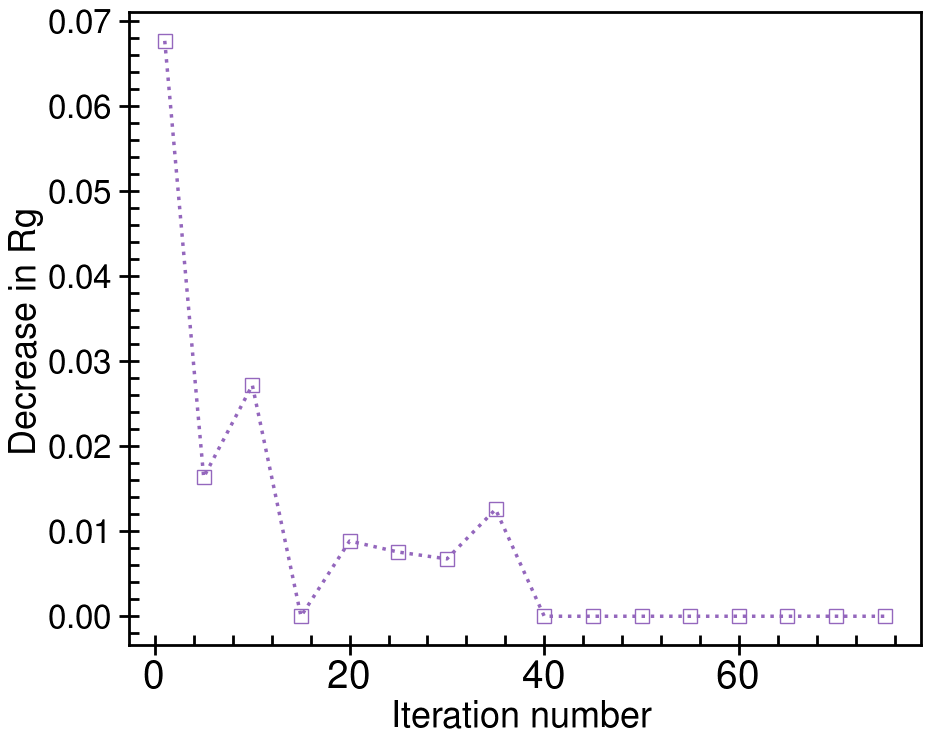

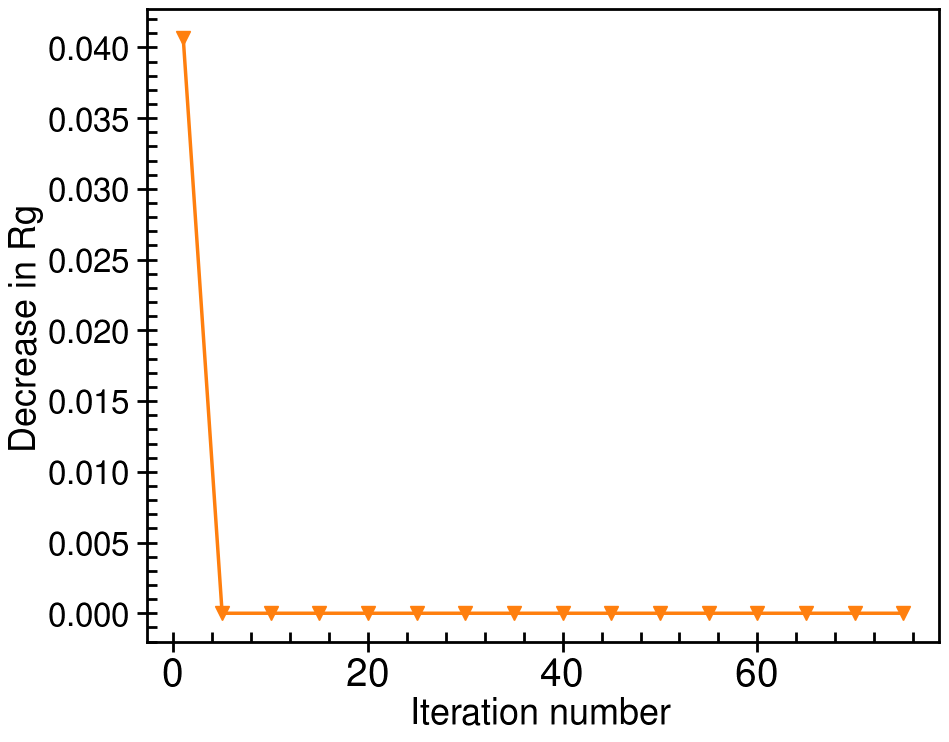

In [18]:
#Figure 7

text1 = t
linestyles = mpltex.linestyle_generator()
elems = [0] + list(5*np.arange(1, 16) -1 )
x = [iteration_x_coord[elem] for elem in elems]

major_size = 15
minor_size = 7




op = op_i
text2 = " Pure Exploitation"

fig, ax = plt.subplots(figsize = (12, 12))
y =[op[elem] for elem in elems]
plt.plot(x, y, **next(linestyles), markersize = 10)
plt.ylabel('Decrease in Rg', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
   
ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
    




fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text1 + '/' +text1 + '_'+text2 + '_rate.pdf', bbox_inches='tight')

op = op_ii
text2 = " Pure Exploration"

fig, ax = plt.subplots(figsize = (12, 12))
y =[op[elem] for elem in elems]
plt.plot(x, y, **next(linestyles), markersize = 10)
plt.ylabel('Decrease in Rg', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
   
ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
    
fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text1 + '/' +text1 + '_'+text2 + '_rate.pdf', bbox_inches='tight')


op = op_iii
text2 = " Max EI"

fig, ax = plt.subplots(figsize = (12, 12))
y =[op[elem] for elem in elems]
plt.plot(x, y, **next(linestyles), markersize = 10)
plt.ylabel('Decrease in Rg', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

   
ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
    
fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text1 + '/' +text1 + '_'+text2 + '_rate.pdf', bbox_inches='tight')

op = op_iv
text2 = " Max PI"

fig, ax = plt.subplots(figsize = (12, 12))
y =[op[elem] for elem in elems]
plt.plot(x, y, **next(linestyles), markersize = 10)
plt.ylabel('Decrease in Rg', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

   
ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')


ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
    
fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text1 + '/' +text1 + '_'+text2 + '_rate.pdf', bbox_inches='tight')

op = op_v
text2 = " Random"

fig, ax = plt.subplots(figsize = (12, 12))
y =[op[elem] for elem in elems]
plt.plot(x, y, **next(linestyles), markersize = 10)
plt.ylabel('Decrease in Rg', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

   
ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')


ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False
    
fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/'+ text1 + '/' +text1 + '_'+text2 + '_rate.pdf', bbox_inches='tight')





Max EI and Max PI for specific cases, as a function of Iteration number

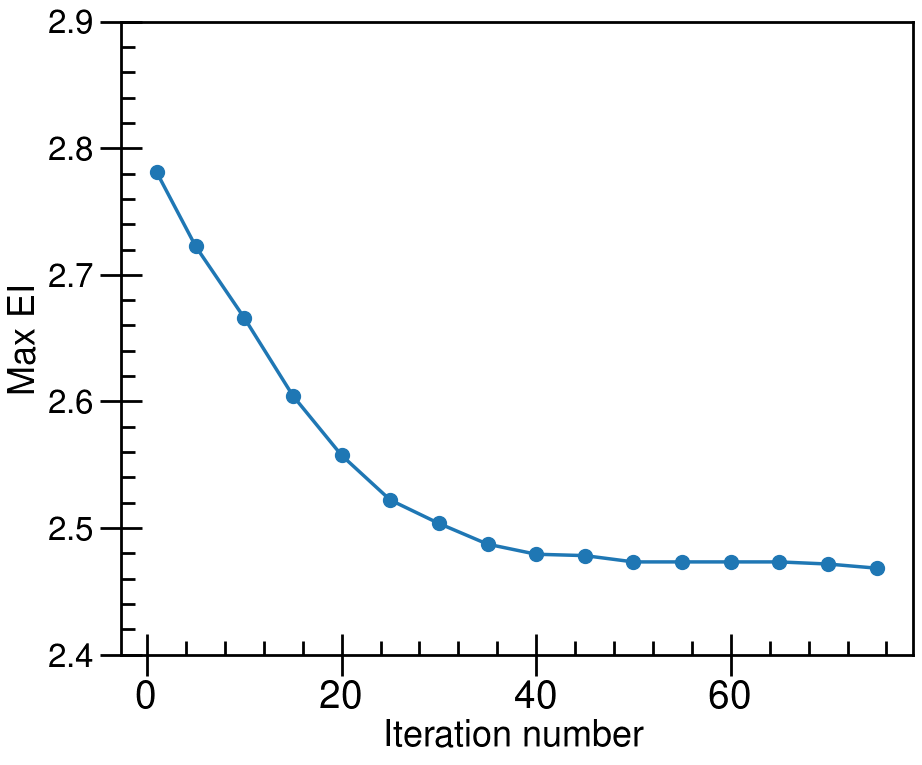

In [45]:
#Figure 8

major_size = 30
minor_size = 10

text = t + 'Query Strategy: Max EI'

elems = [0] + list(5*np.arange(1, 16) -1 )
x = [iteration_x_coord[elem] for elem in elems]
y1 = [min_fitness_sofar_iii[1:][elem] for elem in elems]
y2 = [max_maxEI[elem] for elem in elems]

#plt.plot(x, y1, 'k')
#plt.plot(x, y1, 'ro')



linestyles = mpltex.linestyle_generator()

fig, ax0 = plt.subplots(figsize=(12,12)) 


plt.plot(x, y1, **next(linestyles), markersize = 10)
plt.ylim([2.40, 2.90])
plt.ylabel('Max EI', fontweight='bold')

plt.xlabel('Iteration number', fontweight='bold')
ax0.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax0.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax0.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax0.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax0.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax0.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax0.xaxis.get_major_formatter()._usetex = False
ax0.yaxis.get_major_formatter()._usetex = False
    


fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + '_graph1a.pdf', bbox_inches='tight')




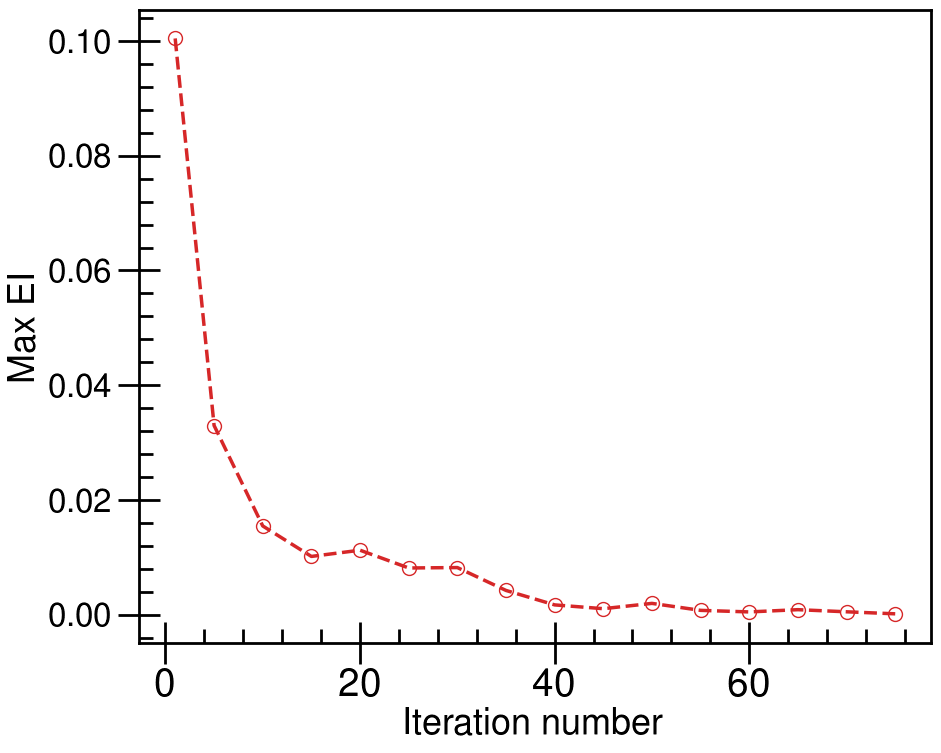

In [22]:
linestyles = mpltex.linestyle_generator()


fig, ax1 = plt.subplots(figsize=(12,12))
#plt.plot(x, y2, 'k')
#plt.plot(x, y2, 'ro')


plt.plot(x, y2, **next(linestyles), markersize = 10)

plt.ylabel('Max EI', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax1.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax1.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax1.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax1.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax1.xaxis.get_major_formatter()._usetex = False
ax1.yaxis.get_major_formatter()._usetex = False
 

fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + '_graph1b.pdf', bbox_inches='tight')
plt.show()

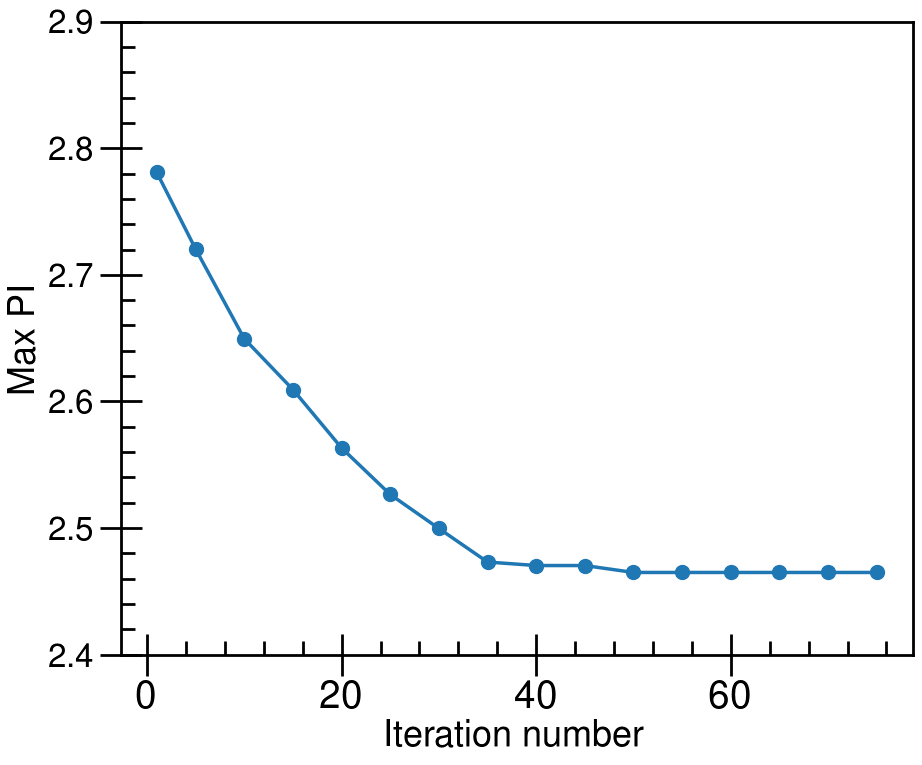

In [44]:
#Figure 9

major_size = 30
minor_size = 10

elems = [0] + list(5*np.arange(1, 16) -1 )
x = [iteration_x_coord[elem] for elem in elems]
y1 = [min_fitness_sofar_iv[1:][elem] for elem in elems]
y2 = [max_maxPI[elem] for elem in elems]


linestyles = mpltex.linestyle_generator()


fig, ax0 = plt.subplots(figsize=(12,12))    

plt.plot(x, y1, **next(linestyles), markersize = 10)
plt.ylim([2.40, 2.90])
plt.ylabel('Max PI', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')
ax0.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax0.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax0.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax0.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax0.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax0.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax0.xaxis.get_major_formatter()._usetex = False
ax0.yaxis.get_major_formatter()._usetex = False
    


fig.set_size_inches(width, height)

plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + 'graph3a.pdf', bbox_inches='tight')




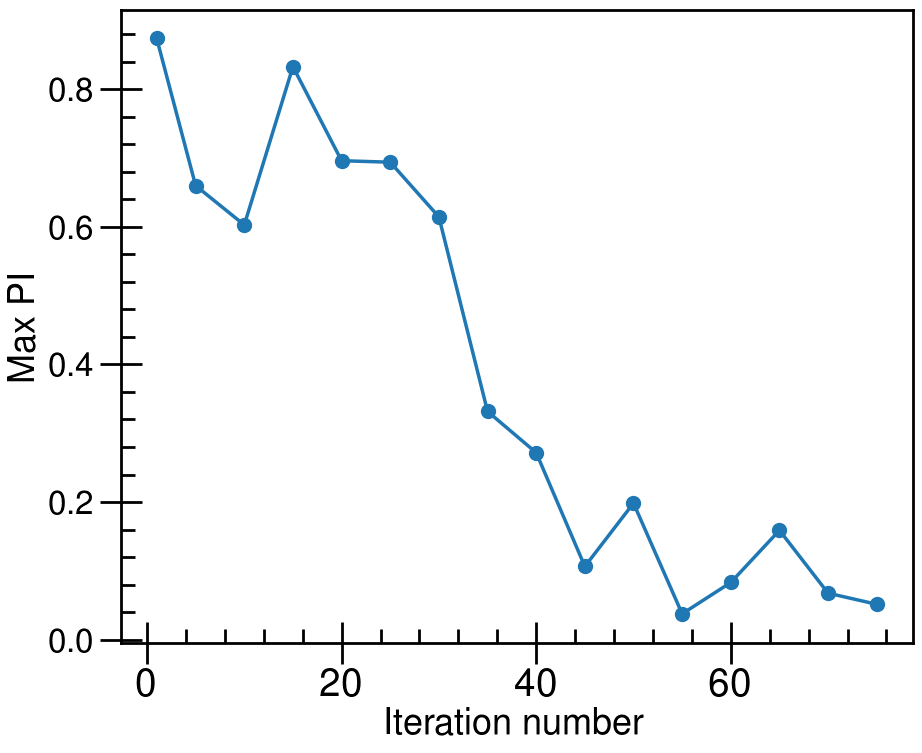

In [27]:
linestyles = mpltex.linestyle_generator()

fig, ax1 = plt.subplots(figsize=(12,12))

plt.plot(x, y2, **next(linestyles), markersize = 10)

plt.ylabel('Max PI', fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')

ax1.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax1.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax1.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax1.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax1.xaxis.get_major_formatter()._usetex = False
ax1.yaxis.get_major_formatter()._usetex = False



fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + 'graph3b.pdf', bbox_inches='tight')
plt.show()



Plot of the R-squared (comparing true and predicted values of the 32 candidates appended to the training
set in each iteration) as a function of iteration number for active learning

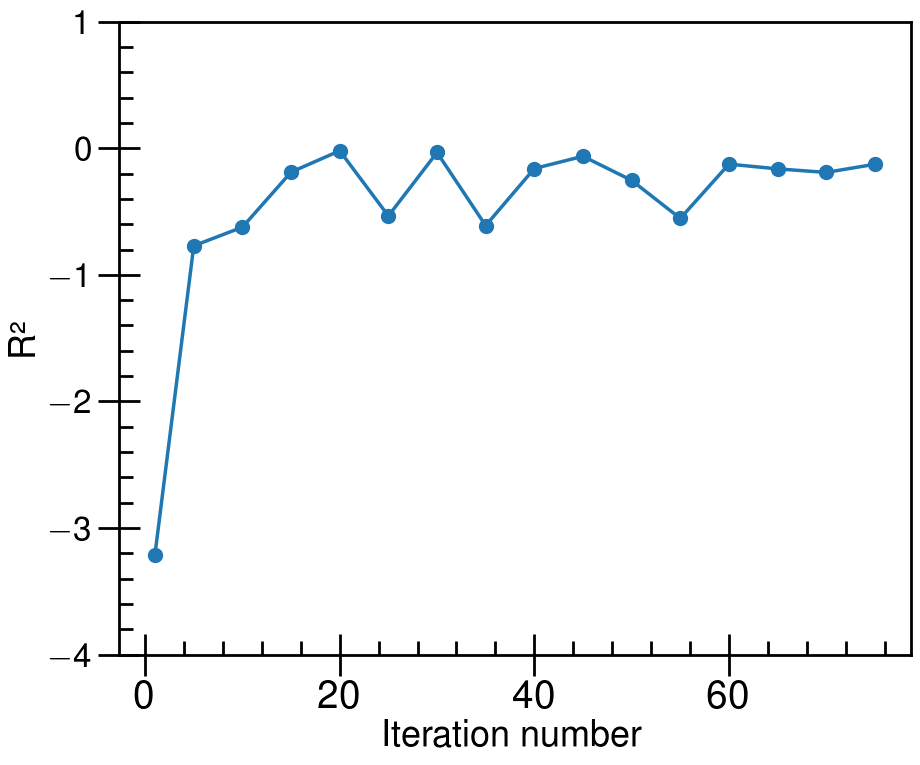

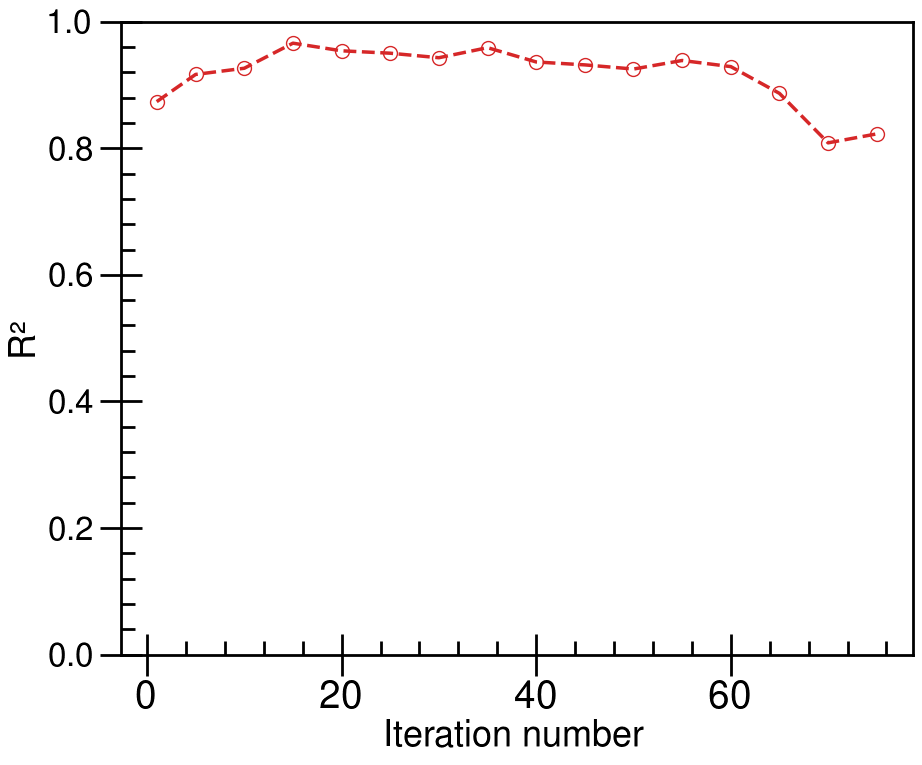

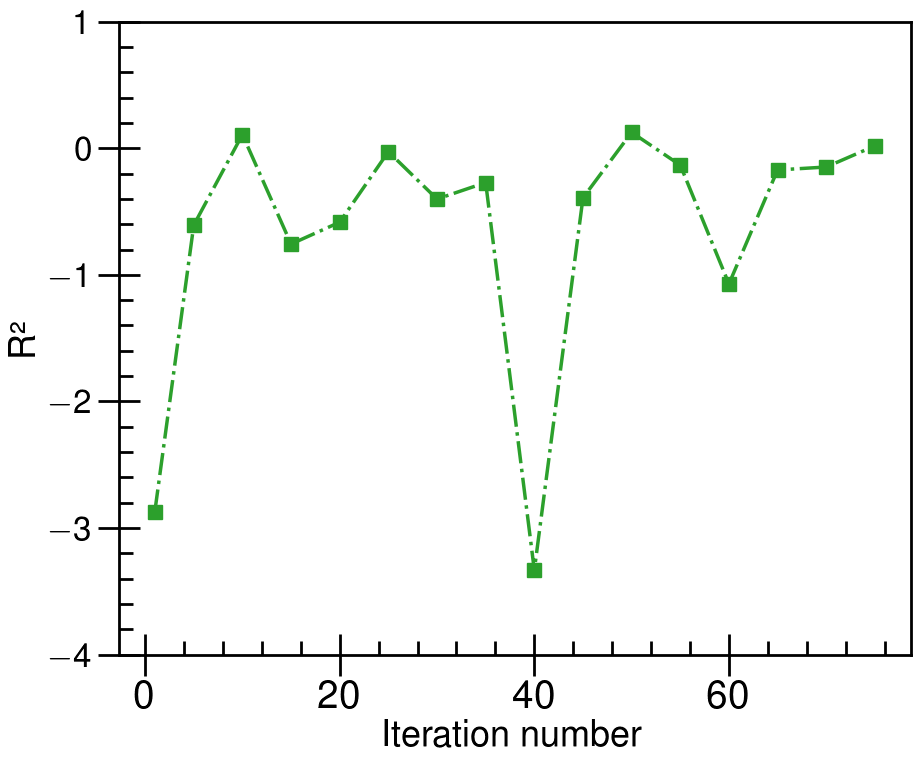

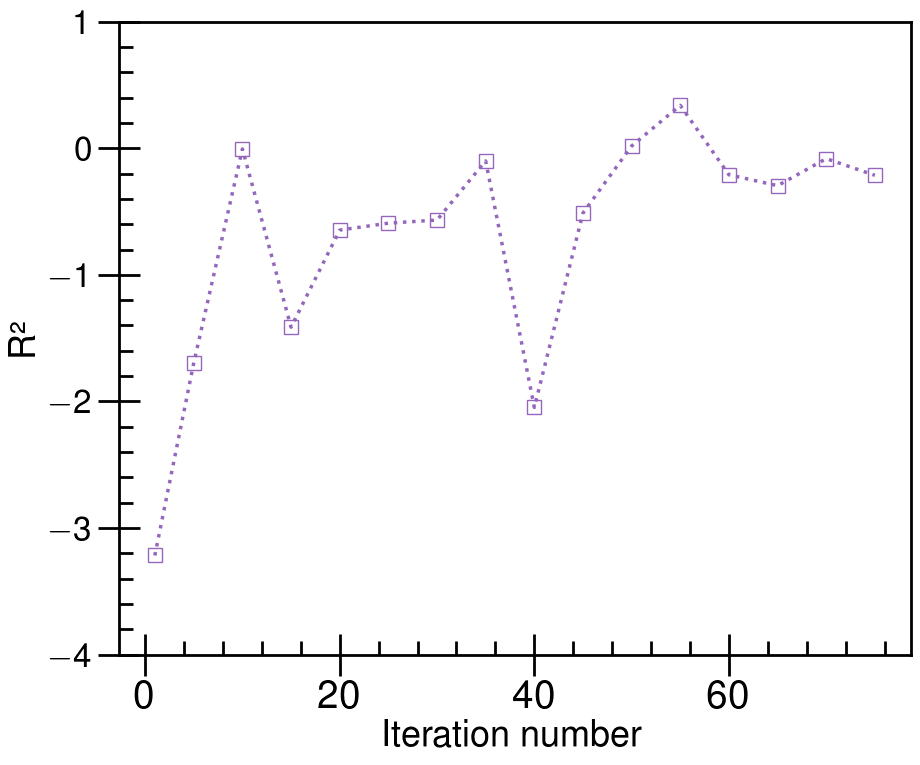

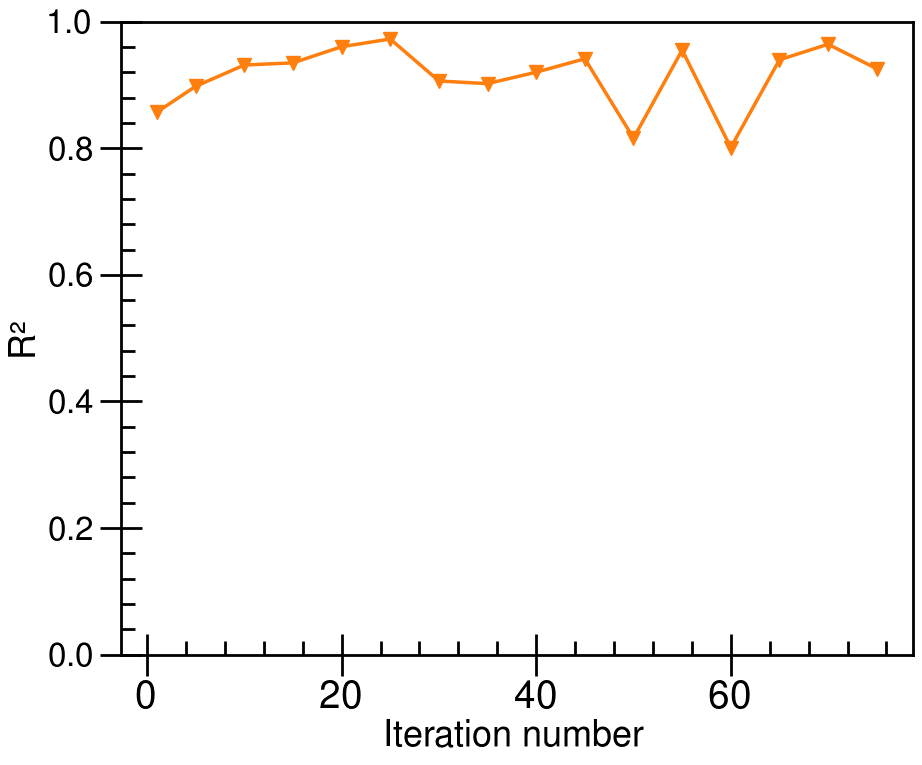

In [28]:
#Figure 10

text1 = t
linestyles = mpltex.linestyle_generator()
elems = [0] + list(5*np.arange(1, 16) -1 )
x = [iteration_x_coord[elem] for elem in elems]

r2_nice= str(f'R\N{SUPERSCRIPT TWO}')

major_size = 30
minor_size = 10

r2_list= r2_list_i
text2 = " Pure Exploitation"
fig, ax = plt.subplots(figsize=(12,12))
y =[r2_list[elem] for elem in elems]
plt.plot(x, y, **next(linestyles), markersize = 10)
plt.ylabel(r2_nice, fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')


plt.ylim([-4,1])
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False



fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +text1 + '/'+ text1 + '_' + text2 + '_Rsquared.pdf', bbox_inches='tight')





r2_list= r2_list_ii
text2 = " Pure Exploration"
fig, ax = plt.subplots(figsize=(12,12))
y =[r2_list[elem] for elem in elems]
plt.ylim([0,1])
plt.plot(x, y, **next(linestyles), markersize = 10)


plt.ylabel(r2_nice, fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')

ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False


fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +text1 + '/'+ text1 + '_' + text2 + '_Rsquared.pdf', bbox_inches='tight')







r2_list= r2_list_iii
text2 = " Max EI"
fig, ax = plt.subplots(figsize=(12,12))
y =[r2_list[elem] for elem in elems]
plt.ylim([-4,1])
plt.plot(x, y, **next(linestyles), markersize = 10)

plt.ylabel(r2_nice, fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')


ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False



fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +text1 + '/'+ text1 + '_' + text2 + '_Rsquared.pdf', bbox_inches='tight')



r2_list= r2_list_iv
text2 = " Max PI"
fig, ax = plt.subplots(figsize=(12,12))
y =[r2_list[elem] for elem in elems]
plt.ylim([-4,1])
plt.plot(x, y, **next(linestyles), markersize = 10)

plt.ylabel(r2_nice, fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')

ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False



fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +text1 + '/'+ text1 + '_' + text2 + '_Rsquared.pdf', bbox_inches='tight')



r2_list= r2_list_v
text2 = " Random"
fig, ax = plt.subplots(figsize=(12,12))
y =[r2_list[elem] for elem in elems]
plt.ylim([0,1])
plt.plot(x, y, **next(linestyles), markersize = 10)

plt.ylabel(r2_nice, fontweight='bold')
plt.xlabel('Iteration number', fontweight='bold')

ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax.xaxis.get_major_formatter()._usetex = False
ax.yaxis.get_major_formatter()._usetex = False



fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +text1 + '/'+ text1 + '_' + text2 + '_Rsquared.pdf', bbox_inches='tight')






Analysis of Exploitation-Exploration Trade-off. Number of common candidates among Max EI – pure exploitation, max
EI-pure exploration, max PI – pure exploitation, max PI- pure exploration

In [32]:
#Figure 12

major_size = 15
minor_size = 7

elems = [0] + list(5*np.arange(1, 16) -1 )
x = [iteration_x_coord[elem] for elem in elems]

In [33]:
linestyles = mpltex.linestyle_generator()

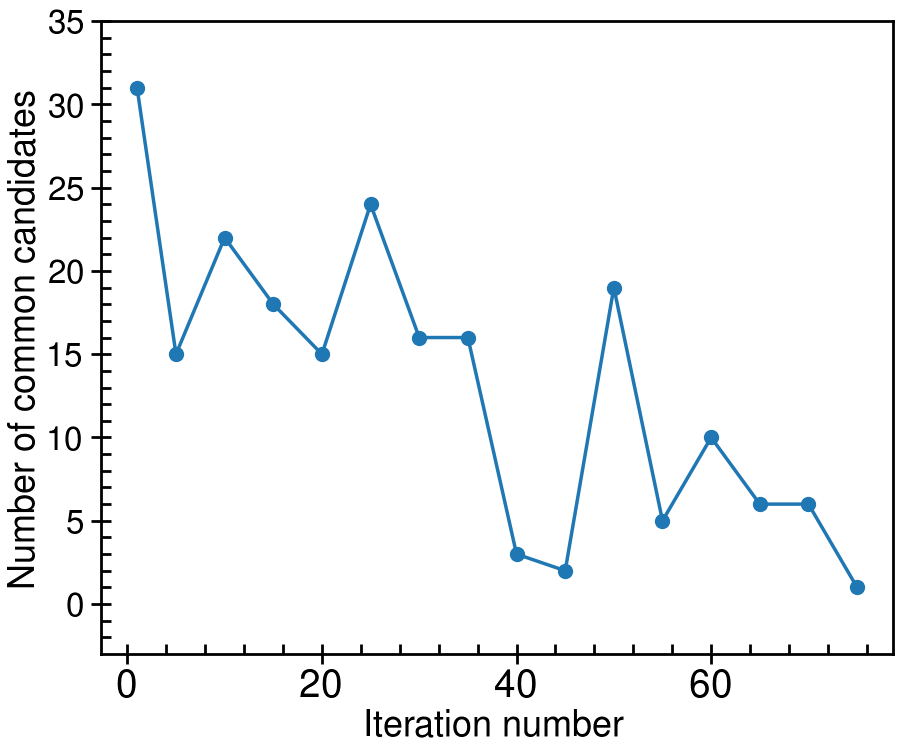

In [34]:
y1 =[exploit_maxEI_common[elem] for elem in elems]
text = 'Exploitation & MaxEI'
fig, ax1 = plt.subplots(figsize=(12,12))
plt.plot(x, y1, **next(linestyles), markersize = 10)
ax1.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax1.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax1.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax1.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax1.xaxis.get_major_formatter()._usetex = False
ax1.yaxis.get_major_formatter()._usetex = False




plt.ylim([-3,35])
plt.ylabel('Number of common candidates', fontweight = 'bold')
plt.xlabel('Iteration number', fontweight = 'bold')
fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + t + '_graph2a.pdf', bbox_inches='tight')


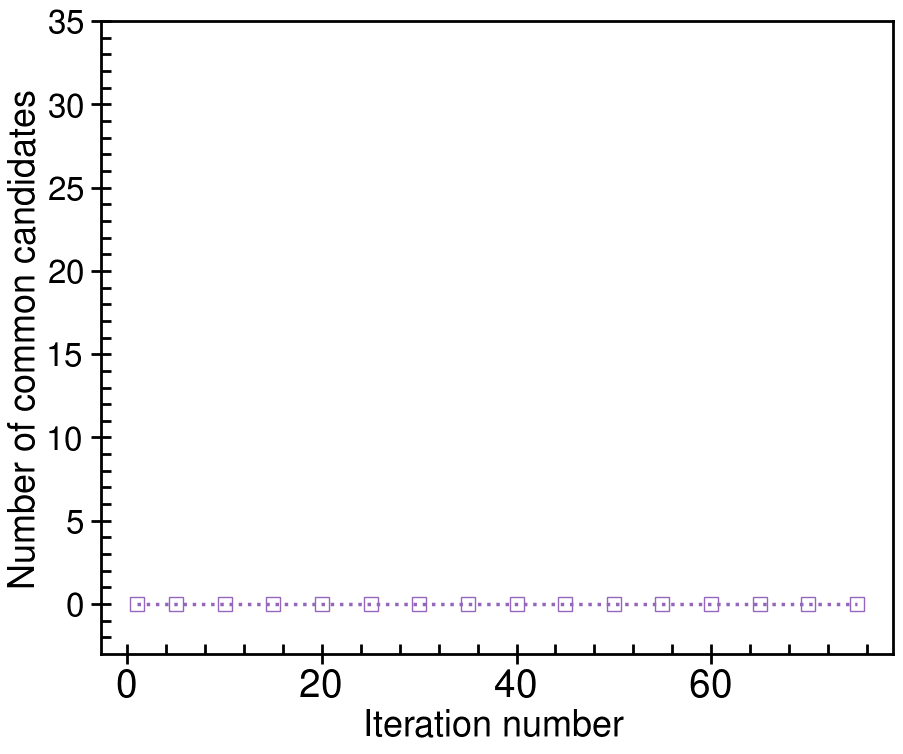

In [37]:

y2 = [explore_maxEI_common[elem] for elem in elems]
text = 'Exploration & MaxEI'
fig, ax2 = plt.subplots(figsize=(12,12))
ax2.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax2.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax2.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax2.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax2.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax2.xaxis.get_major_formatter()._usetex = False
ax2.yaxis.get_major_formatter()._usetex = False



plt.ylim([-3,35])
plt.ylabel('Number of common candidates', fontweight = 'bold')
plt.xlabel('Iteration number', fontweight = 'bold')
fig.set_size_inches(width, height)
plt.plot(x, y2, **next(linestyles), markersize = 10)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + t + '_graph2b.pdf', bbox_inches='tight')


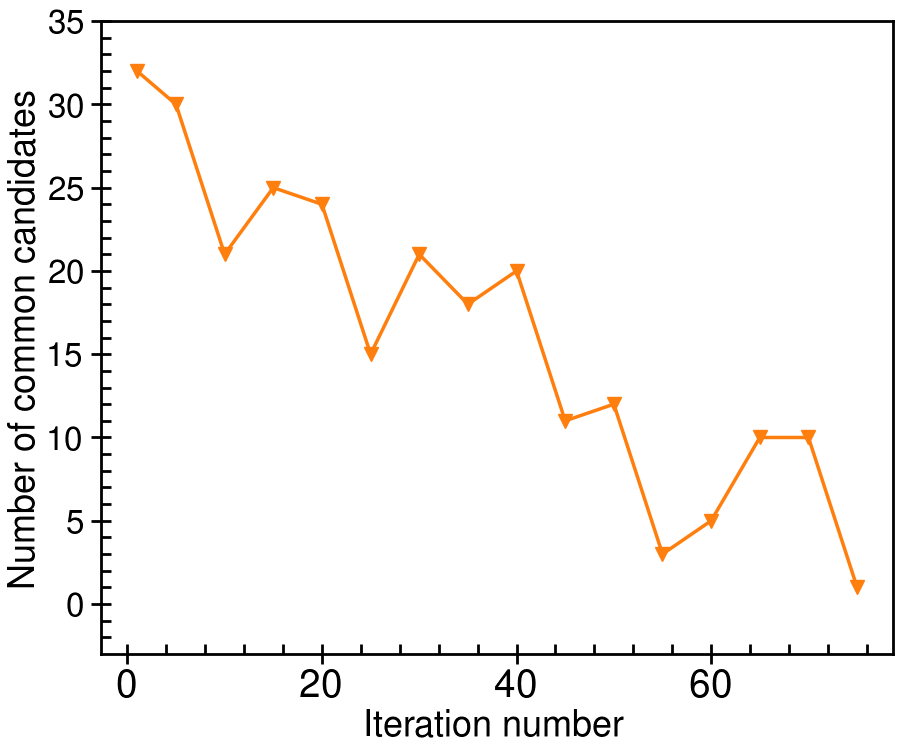

In [38]:
y3 = [exploit_maxPI_common[elem] for elem in elems]
fig, ax3= plt.subplots(figsize=(12,12))
text = 'Exploitation & MaxPI'
ax3.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax3.xaxis.set_minor_locator(  AutoMinorLocator(5))


ax3.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax3.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax3.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax3.xaxis.get_major_formatter()._usetex = False
ax3.yaxis.get_major_formatter()._usetex = False




plt.ylim([-3,35])
plt.ylabel('Number of common candidates', fontweight = 'bold')
plt.xlabel('Iteration number', fontweight = 'bold')
plt.plot(x, y3, **next(linestyles), markersize = 10)
fig.set_size_inches(width, height)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + t + '_graph4a.pdf', bbox_inches='tight')




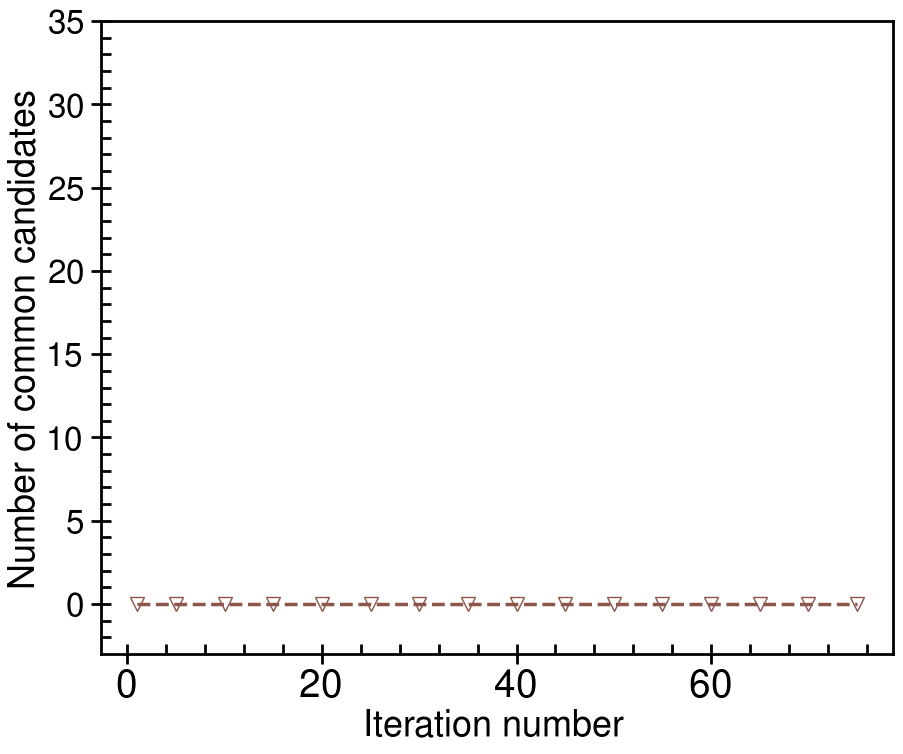

In [39]:
y4 = [explore_maxPI_common[elem] for elem in elems]
fig, ax4 = plt.subplots(figsize=(12,12))
text = 'Exploration & MaxPI'
ax4.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax4.xaxis.set_minor_locator(  AutoMinorLocator(5))

ax4.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
ax4.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

ax4.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

ax4.xaxis.get_major_formatter()._usetex = False
ax4.yaxis.get_major_formatter()._usetex = False



plt.ylim([-3,35])
plt.ylabel('Number of common candidates', fontweight = 'bold')
plt.xlabel('Iteration number', fontweight = 'bold')
fig.set_size_inches(width, height)
plt.plot(x, y4, **next(linestyles), markersize = 10)
plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +t + '/' + t + '_graph4b.pdf', bbox_inches='tight')


Number of candidates sampled in each iteration for each acquisition function

In [40]:
#Figure 13

elems = [0] + list(5*np.arange(16)-1)
x = [iteration_x_coord[elem] for elem in elems]
y1 = [sp_i[elem] for elem in elems]
y2 = [sp_ii[elem] for elem in elems]
y3 = [sp_iii[elem] for elem in elems]
y4 = [sp_iv[elem] for elem in elems]
y5 = [sp_v[elem] for elem in elems]

major_size = 30
minor_size = 10

In [41]:
def sampling_pool(text):
    
    m = 4
    l = 1
    
    linestyles = mpltex.linestyle_generator()
    
    fig, ax = plt.subplots(figsize=(12,12))

    ax.plot(x, y1, label = "Pure exploitation", **next(linestyles), markersize = m, linewidth = l)
    ax.plot(x, y2, label = "Pure exploration", **next(linestyles), markersize = m, linewidth = l)
    ax.plot(x, y3, label = "Max EI",  **next(linestyles), markersize = m, linewidth = l)    
    ax.plot(x, y4, label = "Max PI",  **next(linestyles), markersize = m, linewidth = l)
    ax.plot(x, y5,  label = "Random",  **next(linestyles), markersize = m, linewidth = l)

    plt.legend(loc="best", frameon=False, markerscale=2.)

    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))

    ax.xaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')
    ax.yaxis.set_tick_params(which='major', size=major_size, width=2, direction='inout')

    ax.xaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=minor_size, width=2, direction='in')

    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False

    
    #plt.ylabel('Size of Search Space ', fontweight='bold')
    plt.xlabel('Iteration number', fontweight='bold')
    plt.xticks(weight = 'bold')
    
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax.axes.yaxis.set_ticklabels([])
    
    fig.set_size_inches(width, height)  

    plt.savefig('/Users/praneeth/Downloads/Active_Learning/Date_June17/' +text + '/' +text + '_sampling_pool.pdf', bbox_inches='tight')

    plt.show()

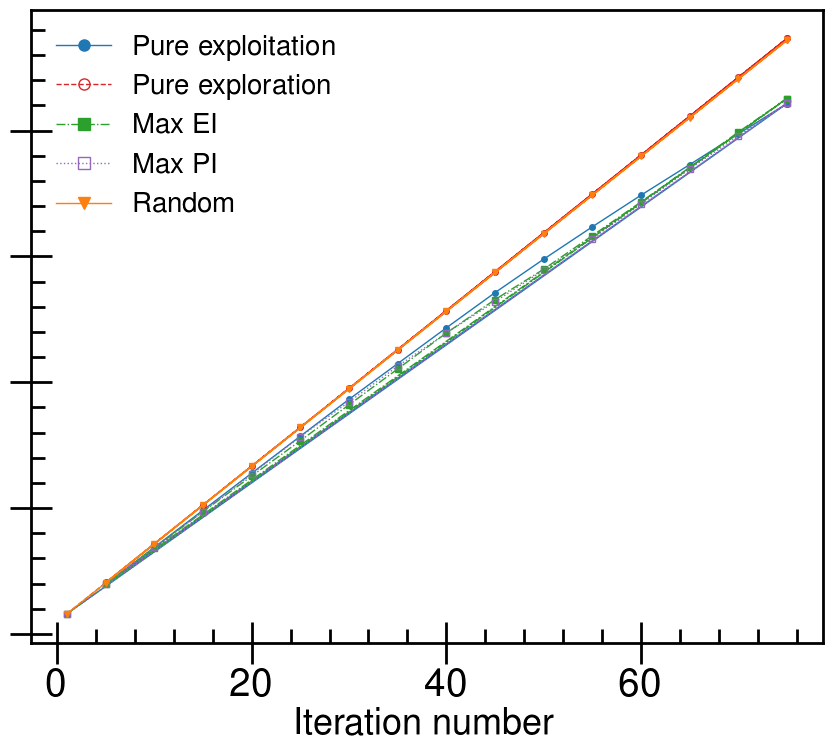

In [42]:
sampling_pool(t)